# Implementing a CNN for MNIST Dataset Using Keras

In [14]:
import keras
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
mnist_data = input_data.read_data_sets("MNIST_dataset", one_hot = True)

Extracting MNIST_dataset\train-images-idx3-ubyte.gz
Extracting MNIST_dataset\train-labels-idx1-ubyte.gz
Extracting MNIST_dataset\t10k-images-idx3-ubyte.gz
Extracting MNIST_dataset\t10k-labels-idx1-ubyte.gz


The mnist variable created above contains both the images and their labels. Isolate the images for now. There will be 55,000 images and each will be of size 28 x 28.

In [17]:
x_train = mnist_data.train.images[:55000,:]
x_train.shape

(55000, 784)

Let's look at what a random image might look like.

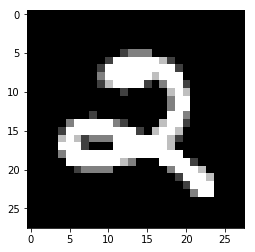

In [20]:
randumNum = random.randint(0,55000)
image = x_train[randumNum].reshape([28,28])
plt.imshow(image, cmap=plt.get_cmap('gray_r'))
plt.show()

In [21]:
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization
from keras.models import Sequential

In [22]:
model = Sequential()
model.add(Conv2D(32, 3, activation='relu', input_shape=[28, 28, 1]))
model.add(MaxPool2D())
model.add(BatchNormalization())
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPool2D())
model.add(BatchNormalization())
model.add(Conv2D(128, 3, activation='relu'))
model.add(MaxPool2D())
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 5, 5, 64)          256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         73856     
__________

In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
epochs = 20
train = mnist_data.train.images
train_images = np.reshape(train, (-1, 28, 28, 1))
test = mnist_data.test.images
test_images = np.reshape(test, (-1, 28, 28, 1))
model.fit(train_images, mnist_data.train.labels,
         validation_data=(test_images, mnist_data.test.labels),
         epochs=epochs, batch_size=64, verbose=1)

Train on 55000 samples, validate on 10000 samples
Epoch 1/20
55000/55000 [==============================] - 65s 1ms/step - loss: 0.1198 - acc: 0.9635 - val_loss: 0.0575 - val_acc: 0.9837
Epoch 2/20
55000/55000 [==============================] - 48s 880us/step - loss: 0.0490 - acc: 0.9844 - val_loss: 0.0900 - val_acc: 0.9750
Epoch 3/20
55000/55000 [==============================] - 46s 829us/step - loss: 0.0376 - acc: 0.9877 - val_loss: 0.0590 - val_acc: 0.9816
Epoch 4/20
55000/55000 [==============================] - 47s 846us/step - loss: 0.0277 - acc: 0.9910 - val_loss: 0.0462 - val_acc: 0.9877
Epoch 5/20
55000/55000 [==============================] - 46s 841us/step - loss: 0.0220 - acc: 0.9930 - val_loss: 0.0641 - val_acc: 0.9819
Epoch 6/20
55000/55000 [==============================] - 46s 833us/step - loss: 0.0220 - acc: 0.9925 - val_loss: 0.0495 - val_acc: 0.9859
Epoch 7/20
55000/55000 [==============================] - 46s 834us/step - loss: 0.0179 - acc: 0.9943 - val_loss: 0.05